In [1]:
# URL: https://github.com/random-forests/tutorials/blob/master/ep7.ipynb

In [2]:
import sys

In [3]:
print("Python:",sys.version)

Python: 3.9.6 (default, Nov 10 2023, 13:38:27) 
[Clang 15.0.0 (clang-1500.1.0.2.5)]


In [4]:
import numpy as np

In [5]:
print("numpy:",np.__version__)

numpy: 1.26.4


In [6]:
import matplotlib as mp

In [7]:
print("matplotlib:",mp.__version__)

matplotlib: 3.9.4


In [8]:
import os

In [9]:
print("os:",dir(os))

os: ['CLD_CONTINUED', 'CLD_DUMPED', 'CLD_EXITED', 'CLD_KILLED', 'CLD_STOPPED', 'CLD_TRAPPED', 'DirEntry', 'EX_CANTCREAT', 'EX_CONFIG', 'EX_DATAERR', 'EX_IOERR', 'EX_NOHOST', 'EX_NOINPUT', 'EX_NOPERM', 'EX_NOUSER', 'EX_OK', 'EX_OSERR', 'EX_OSFILE', 'EX_PROTOCOL', 'EX_SOFTWARE', 'EX_TEMPFAIL', 'EX_UNAVAILABLE', 'EX_USAGE', 'F_LOCK', 'F_OK', 'F_TEST', 'F_TLOCK', 'F_ULOCK', 'GenericAlias', 'Mapping', 'MutableMapping', 'NGROUPS_MAX', 'O_ACCMODE', 'O_APPEND', 'O_ASYNC', 'O_CLOEXEC', 'O_CREAT', 'O_DIRECTORY', 'O_DSYNC', 'O_EXCL', 'O_EXEC', 'O_EXLOCK', 'O_NDELAY', 'O_NOCTTY', 'O_NOFOLLOW', 'O_NONBLOCK', 'O_RDONLY', 'O_RDWR', 'O_SEARCH', 'O_SHLOCK', 'O_SYNC', 'O_TRUNC', 'O_WRONLY', 'POSIX_SPAWN_CLOSE', 'POSIX_SPAWN_DUP2', 'POSIX_SPAWN_OPEN', 'PRIO_PGRP', 'PRIO_PROCESS', 'PRIO_USER', 'P_ALL', 'P_NOWAIT', 'P_NOWAITO', 'P_PGID', 'P_PID', 'P_WAIT', 'PathLike', 'RTLD_GLOBAL', 'RTLD_LAZY', 'RTLD_LOCAL', 'RTLD_NODELETE', 'RTLD_NOLOAD', 'RTLD_NOW', 'R_OK', 'SCHED_FIFO', 'SCHED_OTHER', 'SCHED_RR', 'SEEK

In [10]:
os.__name__

'os'

In [11]:
import inspect

In [12]:
from IPython.display import Image

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn import tree

In [15]:
# !pip install tensorflow version=1.15.0

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

2025-01-08 22:45:55.880971: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/me/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


AttributeError: module 'tensorflow' has no attribute 'contrib'

In [20]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

AttributeError: module 'keras.api.datasets.mnist' has no attribute 'train'

In [21]:
from tensorflow.keras.datasets import mnist

In [22]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
data = X_train
labels = np.asarray(y_train, dtype=np.int32)
test_data = X_test
test_labels = np.asarray(y_test, dtype=np.int32)

In [24]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

In [25]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)  

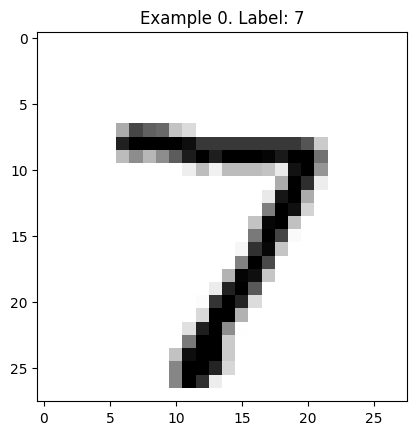

In [26]:
display(0)

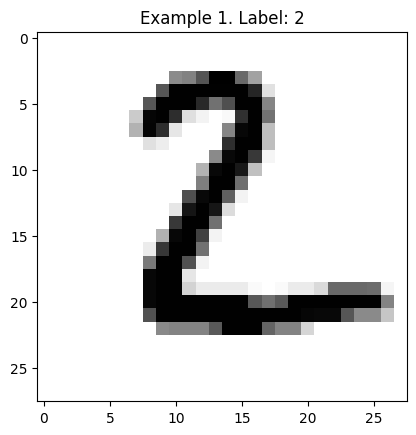

In [27]:
display(1)

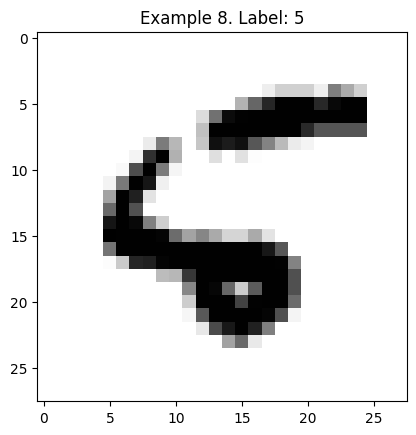

In [28]:
display(8)

In [30]:
print (len(data[0]))

28


In [31]:
# fit a linear classifier

In [32]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

NameError: name 'learn' is not defined

In [ ]:
# evaluate accuracy

In [ ]:
classifier.evaluate(test_data, test_labels)
print classifier.evaluate(test_data, test_labels)["accuracy"]

In [ ]:
# classify a few examples

In [ ]:
# here's one it gets right
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
display(0)

In [ ]:
# and one it gets wrong
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
display(8)

In [ ]:
# visualize learned weights

In [ ]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

In [ ]:
# Next steps

TensorFlow Docker images: https://hub.docker.com/r/tensorflow/tensorflow/
TF.Learn Quickstart: https://www.tensorflow.org/versions/r0.9/tutorials/tflearn/index.html
MNIST tutorial: https://www.tensorflow.org/tutorials/mnist/beginners/index.html
Visualizating MNIST: http://colah.github.io/posts/2014-10-Visualizing-MNIST/
Additional notebooks: https://github.com/tensorflow/tensorflow/tree/master/tensorflow/tools/docker/notebooks
More about linear classifiers: https://www.tensorflow.org/versions/r0.10/tutorials/linear/overview.html#large-scale-linear-models-with-tensorflow
Much more about linear classifiers: http://cs231n.github.io/linear-classify/
Additional TF.Learn samples: https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/skflow